In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [3]:
#importing datasets
data_set= pd.read_csv('/content/sample_data/Position_Salaries.csv')

In [4]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, 1:2].values
y= data_set.iloc[:, 2].values

In [5]:
#Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

In [8]:
 #Fitting the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 4)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

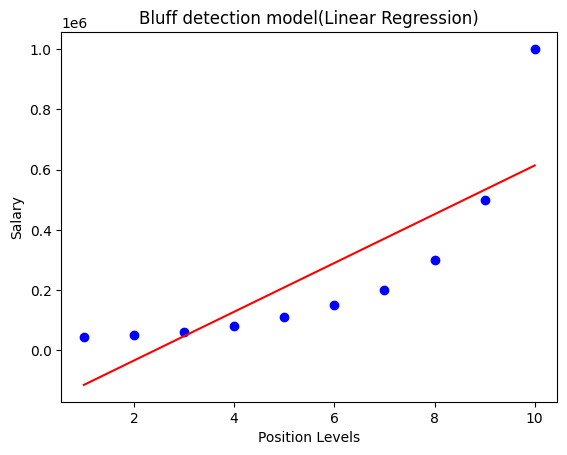

In [6]:
#Visulaizing the result for Linear Regression model
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x), color="red")
mtp.title("Bluff detection model(Linear Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

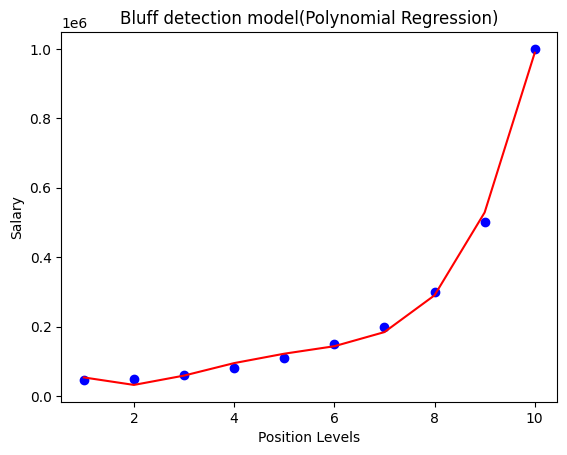

In [9]:
#Visulaizing the result for Polynomial Regression
mtp.scatter(x,y,color="blue")
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")
mtp.title("Bluff detection model(Polynomial Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

# Create a Polynomial Regression model from Scratch using same dataset.

Linear Regression:

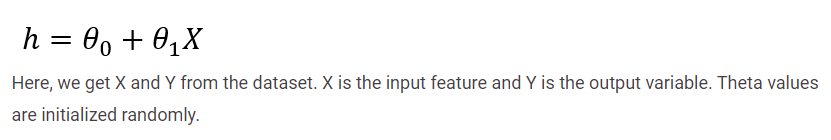

Polynomial regression:

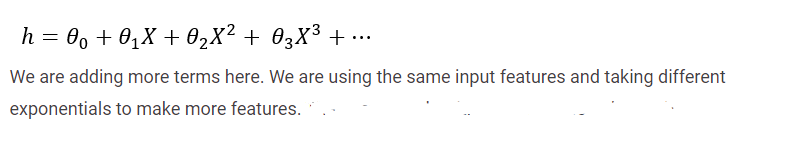

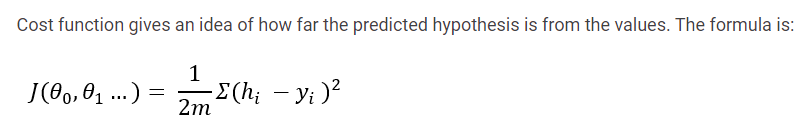

First, deducting the hypothesis from the original output variable. Taking a square to eliminate the negative values. Then dividing that value by 2 times the number of training examples (m).

Gradient Descent: If you take the partial differential of the cost function on each theta, we can derive these formulas:

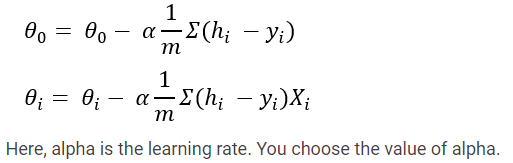

In [8]:
data_set

,Position,Level(X-var),Salary(Y-var)
0,BA,1,45000
1,JC,2,50000
2,SC,3,60000
3,M,4,80000
4,CM,5,110000
5,RM,6,150000
6,P,7,200000
7,SP,8,300000
8,C-level,9,500000
9,CEO,10,1000000


2. Add the bias column for theta 0. This bias column will only contain 1. Because if you multiply 1 with a number it does not change.

In [9]:
df = pd.concat([pd.Series(1, index=data_set.index, name='00'), data_set], axis=1)
df.head()

,00,Position,Level(X-var),Salary(Y-var)
0,1,BA,1,45000
1,1,JC,2,50000
2,1,SC,3,60000
3,1,M,4,80000
4,1,CM,5,110000


3. Delete the ‘Position’ column. Because the ‘Position’ column contains strings and algorithms do not understand strings. We have the ‘Level’ column to represent the positions.

In [10]:
df = df.drop(columns='Position')

4. Define our input variable X and the output variable y. In this example, ‘Level’ is the input feature and ‘Salary’ is the output variable. We want to predict the salary for levels.

In [13]:
y = df['Salary(Y-var)']
X = df.drop(columns = 'Salary(Y-var)')
X.head()

,00,Level(X-var)
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


5. Take the exponentials of the ‘Level’ column to make ‘Level1’ and ‘Level2’ columns.

In [14]:
X['Level1'] = X['Level(X-var)']**2
X['Level2'] = X['Level(X-var)']**3
X.head()

,00,Level(X-var),Level1,Level2
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


6. Now, normalize the data. Divide each column by the maximum value of that column. That way, we will get the values of each column ranging from 0 to 1. The algorithm should work even without normalization. But it helps to converge faster. Also, calculate the value of m which is the length of the dataset.

In [15]:
m = len(X)
X = X/X.max()

7. Define the hypothesis function. That will use the X and theta to predict the ‘y’.

In [21]:
def hypothesis(X, theta):
    y1 = theta*X
    return nm.sum(y1, axis=1)

8. Define the cost function, with our formula for cost-function above:

In [22]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(nm.sqrt((y1-y)**2))/(2*m)

9. Write the function for gradient descent. We will keep updating the theta values until we find our optimum cost. For each iteration, we will calculate the cost for future analysis.

In [23]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

10. All the functions are defined. Now, initialize the theta. Initializing an array of zero. You can take any other random values. Choosing alpha as 0.05 and iterate the theta values for 700 epochs.

In [24]:
theta = nm.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

11. We got our final theta values and the cost in each iteration as well. Let’s find the salary prediction using our final theta.

In [25]:
y_hat = hypothesis(X, theta)

12. Now plot the original salary and our predicted salary against the levels.

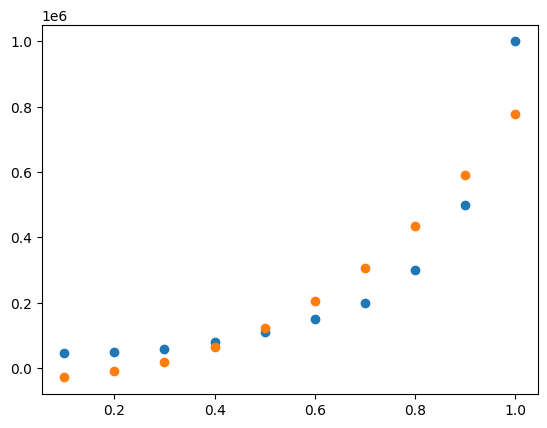

In [27]:
mtp.figure()
mtp.scatter(x=X['Level(X-var)'],y= y)
mtp.scatter(x=X['Level(X-var)'], y=y_hat)
mtp.show()

Our prediction does not exactly follow the trend of salary but it is close. Linear regression can only return a straight line. But in polynomial regression, we can get a curved line like that. If the line would not be a nice curve, polynomial regression can learn some more complex trends as well.

13. Let’s plot the cost we calculated in each epoch in our gradient descent function.

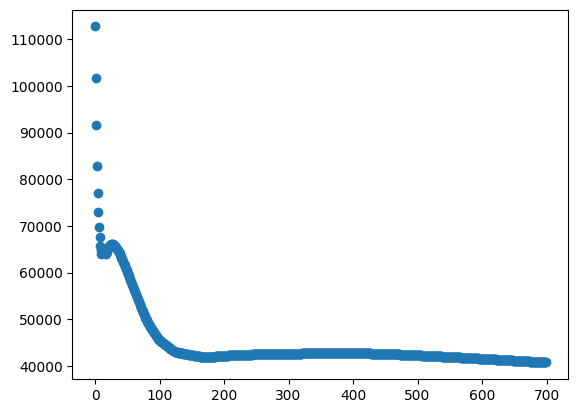

In [28]:
mtp.figure()
mtp.scatter(x=list(range(0, 700)), y=J)
mtp.show()

The cost fell drastically in the beginning and then the fall was slow. In a good machine learning algorithm, cost should keep going down until the convergence. \\
Try it with a different number of epochs and different learning rates (alpha).